#### Objective 1: Profile and explore the data
- Import/open the listing.csv
- Cast any date columns as datetime format
- Filtering the data down to rows where the city is Paris, and keep only the columns 'host_since', 'neighbourhood','city','accommodates', and 'price' in the table
- checking for missing values, and calculate the minimum,maximum, and average for each numeric field.

In [1]:
import pandas as pd

listings = pd.read_csv(r"C:\Users\ElMehdi\Downloads\Airbnb+Data\Airbnb Data\Listings.csv")

C:\Users\ElMehdi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
listings.head(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [4]:
listings["host_since"] = pd.to_datetime(listings["host_since"])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [5]:
paris_listing = (
    listings.query("city == 'Paris'")
    .loc[ :, ["host_since", "neighbourhood", "city", "accommodates", "price"]])

paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [6]:
paris_listing.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [7]:
paris_listing.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [8]:
paris_listing.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

#### Objective 2 : Prepare for visualization
- Creating a table named paris_listings_neighbourhood,that groups Paris listing by 'neighbourhood' and calculates the mean price for each neighborhood sorted from lowest to highest average price.

- Then, creating a table named paris_listings_accomodations, neighborhood in Paris, grouped by the 'accommodations' column, and contain the mean price for each value of 'accommodates' sorted from lowest to highest average price.

- Finally, creating a table called paris_listings_over_time, which is grouped by the year of the 'host_since' column. Calculate a count of rows, representing total number of new hosts, and the average price for each year.

In [9]:
 paris_listing_neighbourhood = (
     paris_listing.groupby("neighbourhood")
     .agg({"price":"mean"})
     .sort_values("price")
 )
  
 paris_listing_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [10]:
  paris_listing_accommodates  = (
     paris_listing.query("neighbourhood == 'Elysee'")
      .groupby("accommodates")
     .agg({"price" : "mean"})
     .sort_values("price")
  )
    
paris_listing_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [11]:
   paris_listing_over_time = (
   paris_listing
   .set_index("host_since")
   .resample("Y")
   .agg({"neighbourhood" : "count" , "price":"mean"
    })
   )
    
paris_listing_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


##### Objective 3: 
- Create a horizontal bar chart of the average price by neighborhood in Paris.

- Create a horizontal bar chart of the average price by 'accommodates' in Paris most expensive neighborhood.

- Create two line charts : one of the count of new hosts over time, and one for average price.

- Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?


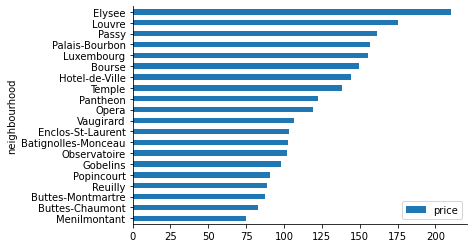

In [24]:
import seaborn as sns

(paris_listing_neighbourhood
 .plot
 .barh()
)

sns.despine()

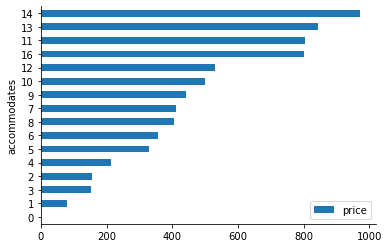

In [26]:
import seaborn as sns

( paris_listing_accommodates
 .plot
 .barh()
)

sns.despine()

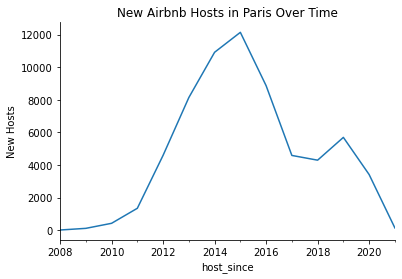

In [29]:
 paris_listing_over_time["neighbourhood"].plot(
ylabel="New Hosts",
title="New Airbnb Hosts in Paris Over Time"
)

sns.despine()

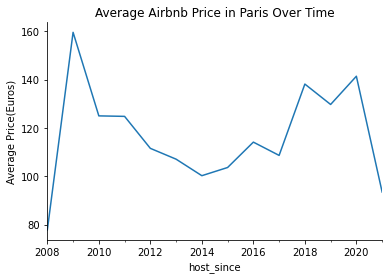

In [31]:
paris_listing_over_time["price"].plot(
ylabel="Average Price(Euros)",
title="Average Airbnb Price in Paris Over Time"
)

sns.despine()

Text(0, 0.5, 'New Hosts ')

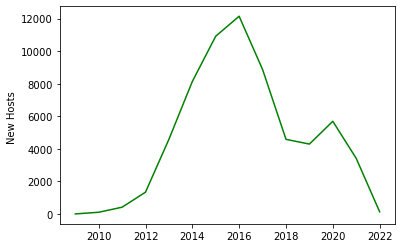

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listing_over_time.index,
    paris_listing_over_time["neighbourhood"],
    label="New Hosts",
    c="green"
)
ax.set_ylabel("New Hosts ")

Text(0, 0.5, 'Average Price ')

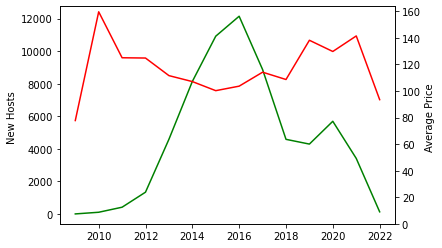

In [42]:
fig, ax = plt.subplots()

ax.plot(
    paris_listing_over_time.index,
    paris_listing_over_time["neighbourhood"],
    label="New Hosts",
    c="green"
)
ax.set_ylabel("New Hosts ")

ax2 = ax.twinx()

ax2.plot(
    paris_listing_over_time.index,
    paris_listing_over_time["price"],
    label="Average Price",
    c="red"
)
ax2.set_ylim(0)

ax2.set_ylabel("Average Price ")

#### Based on the findings, we found that the 2015 regulations had impact on the hosts rising and the average price were decreasing until 2018 new host were decreasing and the average price is increasing slightly till 2021.
